# Question 1

In [1]:
import numpy as np

#Define the hyperbolic tangent activation function
def tanh(x):
    return np.tanh(x)


def tanh_grad(x):
    return 1 - np.tanh(x)**2


class NN():
    def __init__(self,architecture, learning_rate=0.1, activation=lambda x: x, activation_grad=lambda x: 1):
        '''This is a fully connected NN. The architecture is a list, 
        with each element specifying the number of nodes in each layer'''
        self.arch = architecture
        self.num_layers = len(self.arch) - 1
        self.activation = activation
        self.activation_grad = activation_grad
        self.lr = learning_rate
        self.init_weights()
        
        
    def init_weights(self):
        np.random.seed(0) # don't modify this. GSI uses this for checking outputs
        self.weights = []
        self.biases= []
        for n in range(self.num_layers):
             # Create a weight matrix for layer i with random values
            weight_matrix = np.random.rand(self.arch[n], self.arch[n+1])
            self.weights.append(weight_matrix)
            # Create a bias vector for layer i+1 with random values
            if n < self.num_layers:  # Skip the output layer which does not have biases
                bias_vector = np.random.rand(self.arch[n+1])
                self.biases.append(bias_vector)
        return self.weights, self.biases

        
    def feed_forward(self, X):
        self.init_weights()
        self.a_ns = [X]
        self.z_ns = []
        for i in range(self.num_layers):
            z_n = np.dot(self.a_ns[i], self.weights[i]) + self.biases[i]
            a_n = self.activation(z_n)
            self.z_ns.append(z_n)
            self.a_ns.append(a_n)
        return self.a_ns

            
    def loss_func(self, X, y):
        a_loss = self.feed_forward(X)
        return 0.5*np.mean((self.a_ns[-1] - y) ** 2)
    
    
    def calc_layer_errors(self, X, y):
        self.feed_forward(X)
        self.layer_errors = []
        #Start with the error at the last layer
        output = (self.a_ns[-1]-y) * self.activation_grad(self.z_ns[-1])/(1*self.arch[-1]) #batch size =1; NL = n-th layer
        self.layer_errors.append(output)

        #propagate the error backwards through the hidden layers
        for i in reversed(range(1, self.num_layers)):
            layer_error = np.dot(self.layer_errors[-1], self.weights[i].T) * self.activation_grad(self.z_ns[i-1])
            self.layer_errors.append(layer_error)  # Insert the error at the beginning of the list

        #Reverse the list to make it fit to backpropagation
        self.layer_errors.reverse()
        return self.layer_errors
    
    def calc_grads(self, X, y):
        self.calc_layer_errors(X, y)
        self.biases_grad, self.weights_grad = [], []
        
        for i in range(self.num_layers):
            weight_grad = np.dot(self.a_ns[i+1].T , self.layer_errors[i])/X.shape[0]
            biases_grad = np.sum(self.layer_errors[i], axis=0)
            self.weights_grad.append(weight_grad)
            self.biases_grad.append(biases_grad)
        return self.weights_grad,self.biases_grad
        
        
    def back_prop(self, X, y):
        self.calc_grads(X, y)
        for i in range(self.num_layers):
            self.weights[i] -= self.lr * self.weights_grad[i]
            self.biases[i] -= self.lr * self.biases_grad[i]
        return self.weights, self.biases
    

## (a)

In [2]:
nn = NN([6, 2, 2], 0.1, tanh, tanh_grad)
# print the initialized weights
nn.init_weights()
print(f"This is the initial weights: \n {nn.weights}")
print(f"This is the biases: \n {nn.biases}")
print(nn.arch[-1])

This is the initial weights: 
 [array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492]]), array([[0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985]])]
This is the biases: 
 [array([0.56804456, 0.92559664]), array([0.77815675, 0.87001215])]
2


## (b)

*For debugging*: if you use `np.random.random` to initialize weights and biases and set `np.random.seed(0)`. You will get `[[0.64027023 0.25119984]]` as the prediction

In [3]:
# print the prediction
X_input = np.array([-1, 1, -1, -1, 1, -1])
output = nn.feed_forward(X=X_input)
print(output[-1])
print(output)

[0.64027023 0.25119984]
[array([-1,  1, -1, -1,  1, -1]), array([-0.06720839, -0.72958059]), array([0.64027023, 0.25119984])]


## (c)

*Hint*: For the definition of layer errors, you can refer to the matrial in bCourses: `Files > Homework > HW3 > Guide_ANN.pdf`. You will use these errors in back-propagation.

*For debugging*: `[array([[0.08505865, 0.23282824]]), array([[0.48392403, 0.58612371]])]` are errors for two layers.

In [4]:
# print layer errors
y_true = np.array([-1,-1])
nn_layer_errors = nn.calc_layer_errors(X = X_input, y=y_true)
print(nn_layer_errors)

[array([0.08505865, 0.23282824]), array([0.48392403, 0.58612371])]


## (d)

In [5]:
# print updated weights & biases
nn.back_prop(X = X_input, y = y_true)


([array([[0.5517399 , 0.71811576],
         [0.60568977, 0.54780958],
         [0.42658119, 0.64882051],
         [0.4405136 , 0.89469939],
         [0.96658915, 0.38636791],
         [0.79465143, 0.53182131]]),
  array([[0.06341812, 0.07951136],
         [0.01260046, 0.82500191]])],
 [array([0.53625587, 0.89380795]), array([0.67115198, 0.76300737])])

# Question 2

**If you want, you can read the following material to help you with the code!**

Let's denote $a$ as the output of our simple perceptron model.

$$ \mathbf{a} = \sigma(\mathbf{z}) = \sigma(\mathbf{Xw+b}) $$

where $X\in \mathbb{R}^{N_{bz}\times N_f}$ is the input data, $N_{bz}$ is the batch size (i.e. number of samples in one calculation) and $N_f$ is the dimension of input features. $\mathbf{w}\in \mathbb{R}^{N_f\times N_o}$ is the weights matrix and $\mathbf{b}\in \mathbb{R}^{N_o}$ is the biases. $N_o$ is the dimension of outputs. $\sigma$ is the activation function.

The loss function is defined as half of the mean squared error (MSE) bewteen predicted values $\mathbf{a}$ and the ground truth $\mathbf{O}$:

$$ C = \frac{1}{2}\mathrm{MSE}(\mathbf{a, O}) = \frac{1}{2N_{bz}N_o}\sum_{m}^{N_{bz}}\sum_{i}^{N_o}(a_{mi}-O_{mi})^2$$

Using the chain rule to calculate the gradient of weights and biases. First define

$$ \boldsymbol{\delta} = \frac{\partial C}{\partial \mathbf{z}} = \frac{\partial C}{\partial \mathbf{a}}\odot \sigma'(z) = \frac{1}{N_{bz}N_o}(\mathbf{a}-\mathbf{O})\odot\sigma'(\mathbf{z})$$

where $\odot$ is elementwise product.

$$ \frac{\partial C}{\partial \mathbf{w}} =  \mathbf{X}^T\frac{\partial C}{\partial \mathbf{z}} = \mathbf{X}^T\boldsymbol{\delta}$$

$$ \frac{\partial C}{\partial \mathbf{b}} =  \sum_{m}^{N_{bz}}\boldsymbol{\delta}_m$$

where $\boldsymbol{\delta}_m$ is the $m$-th row of matrix $\boldsymbol{\delta}$.

In [6]:
import numpy as np

class SimplePerceptron():
    """
    Implementation of simple perceptron regressor
    """
    def __init__(
        self, 
        input_dim, 
        output_dim, 
        learning_rate=0.0001,
        activation=lambda x: x,
        activation_grad=lambda x: 1
    ):
        """
        Initialize a simple perceptron regressor
        
        Parameters
        ----------
        input_dim: int
            Input dimension
        output_dim: int
            Output dimension
        learning_rate: float
            Learning Rate
        activation: Callable
            Activation function
        activation_grad: Callable
            Activation function's first derivative
        """
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activation = activation
        self.activation_grad = activation_grad
        self.lr = learning_rate
        self.weights = np.random.randn(input_dim, output_dim) * 0.01 #initialize the weights
        self.biases = np.zeros((1, output_dim))

    def predict(self, X):
        """
        Get predicted values of given input
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        
        Returns
        -------
        y: numpy.ndarray
            Output, shape (n_samples, output_dim)
        """
        # Convert rank-1 array to rank-2
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        
        # Check that the dimension of accepted input data is the same as expected
        dim = X.shape[1]
        if dim != self.input_dim:
            raise Exception(f"Expected input size {self.input_dim}, accepted {dim}")
        
        self.z = X @ self.weights + self.biases
        self.a = self.activation(self.z)
        return self.a
    
    def fit(self, X, y):
        """
        Fit the model by doing an steepest descent step
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        y: numpy.ndarray
            Labels, shape (n_samples, output_dim)
        """        
        self.predict(X)
        
        errors = (self.a - y) * self.activation_grad(self.z) / y.size   #shape (n_samples, output_dim) 
        weights_grad = np.dot(X.T, errors)                              #shape (input_dim, ouput_dim)
        bias_grad = np.sum(errors, axis=0)                              #shape (output_dim,)

        # Update weights and biases from the gradient
        # just do a simple gradient descent
        self.weights -= self.lr * weights_grad
        self.biases -= self.lr * bias_grad
        
    def train_one_epoch(self, X, y, batch_size=32):
        """
        Train the model for one epoch
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        y: numpy.ndarray
            Labels, shape (n_samples, output_dim)
        batch_size: int
            Batch size
        """
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        if len(y.shape) == 1:
            y = y.reshape((-1, 1))
            
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for i in range(0, X.shape[0], batch_size):
            batch = indices[i: i+batch_size]
            self.fit(X[batch], y[batch])

    def evaluate(self, X, y):
        """
        Get the loss function with given data
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        y: numpy.ndarray
            Labels, shape (n_samples, output_dim)
        
        Returns
        -------
        L: float
            Loss function value.
        """
        # Transform the single-sample data into 2-dimensional, for the convenience of matrix multiplication
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        if len(y.shape) == 1:
            y = y.reshape((-1, 1))
            
        y_pred = self.predict(X)
        # mean squared error
        mse = np.mean((y_pred - y) ** 2)/2
        return mse
    
    def get_weights(self):
        """
        Get weights and biases
        """
        return self.weights.copy(), self.biases.copy()
    
    def set_weights(self, weights, biases):
        """
        Set weights and biases
        """
        self.weights = weights
        self.biases = biases

## (a)

*Hint: Think about what activation function in the SimplePerceptron model should be used to perform a logistic regression?*

One-dimension logistic regression expression:

$$ y = \frac{1}{1+e^{-(ax+b)}} $$

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("titanic.csv")
# data cleaning
subdf = df[["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Age", "Fare", "Survived"]].dropna()

# Categorical features: ["Pclass", "Sex", "Embarked"]
categorical_features = subdf[["Pclass", "Sex", "Embarked"]]
# Continuous features: ["Age", "Fare", "SibSp", "Parch"]
continuous_features = subdf[["Age", "Fare", "SibSp", "Parch"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
X_cont = continuous_features.values # n_sample * n_feature
# calculate avg. and std.
print("Avg:", np.mean(X_cont, axis=0))
print("Std:", np.std(X_cont, axis=0))
# scale (or normalize)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_cont)

scaler.fit(X_cont)
X_norm = scaler.transform(X_cont)
# avg. and std. of scaled data
print("After scaling:")
print("Avg:", np.mean(X_norm, axis=0))
print("Std:", np.std(X_norm, axis=0))

Avg: [29.6420927  34.5672514   0.51404494  0.43258427]
Std: [14.4827517  52.9014591   0.93003832  0.85358139]
After scaling:
Avg: [ 2.94396218e-16 -6.73618464e-17 -1.49692992e-17  1.49692992e-17]
Std: [1. 1. 1. 1.]


In [9]:
from sklearn.preprocessing import OneHotEncoder

# find three catagorical features as an example
X_cate = categorical_features.values
# OneHotEncoding
encoder = OneHotEncoder()

X_onehot = encoder.fit_transform(X_cate).toarray()
y = subdf['Survived'].values.reshape(-1, 1)
y_onehot = encoder.fit_transform(y).toarray()
print(X_onehot.shape)
print(y_onehot.shape)
pd.DataFrame(y_onehot)

(712, 8)
(712, 2)


,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
707,1.0,0.0
708,1.0,0.0
709,0.0,1.0
710,0.0,1.0


In [10]:
# access categories
encoder.categories_

[array([0, 1], dtype=int64)]

## (b)

Here, we will do the following things:

+ Split the data to $k$-folds, use the $k-1$ folds for training and the other fold for testing
+ In each fold, further split the training data ($k-1$ folds of the whole dataset) by 80\%/20\%. Use the 80\% to train the model in certain epochs and use the 20\% as a validation set to determine the best model during training.
+ For each fold, plot the validation loss against training
+ For each fold, report the mean squared error of the total training set (the $k-1$ fold data) and the test set (the other fold data)  

In [11]:
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def sigmoid_grad(x):
    return (1/(1+np.exp(-x)))*(1-(1/(1+np.exp(-x))))

def KFoldCrossValidation(
    k, X, y, epochs, draw_curve=True, learning_rate=0.1, 
    activation=lambda x: x, activation_grad=lambda x: 1,
    verbose=True
):
    """
    K-Fold Validation
    
    Parameters
    ---------
    k: int
        The number of fold in validation
    X: numpy.ndarray
        Input samples, shape (n_samples, input_dim)
    y: numpy.ndarray
        Labels, shape (n_samples, output_dim)
    epochs: int
        Number of training epochs
    draw_curve: bool
        Whether to draw the validation loss against training steps
    learning_rate: float
        Learning rate
    activation: Callable
        Activation function
    activation_grad: Callable
        Gradient of activate function
    verbose: bool
        Whether to print information
    
    Returns
    ------
    model: list
        List of k models
    """
    # Reshape the X,y if they are rank-1
    if len(X.shape) == 1:
        X = X.reshape((-1, 1))
    if len(y.shape) == 1:
        y = y.reshape((-1, 1))
    input_dim = X.shape[1]
    output_dim = y.shape[1]
    
    # do a 5-fold validation
    kf = KFold(n_splits=k, shuffle=True)
    
    if draw_curve:
        n_row, n_col = int(np.ceil(k / 3)), 3 #The ceil of the scalar x is the smallest integer i, such that i >= x.
        fig, axes = plt.subplots(n_row, n_col, figsize=(5 * n_col, 5 * n_row), constrained_layout=True)
        axes = axes.flatten()
    
    models = []
    train_err_list, test_err_list = [], []
    for i, (train_selector, val_selector) in enumerate(kf.split(X)):
        # Decide training examples and testing examples for this fold
        X_train, X_test = X[train_selector], X[val_selector]
        y_train, y_test = y[train_selector], y[val_selector]
        
        # define you models here
        model = SimplePerceptron(input_dim=X.shape[1],output_dim=y.shape[1])
        
        # futher split the X_train by 80%/20%
        # use train_test_split function in sklearn
        X_train_in, X_val, y_train_in, y_val = train_test_split(X_train, y_train, test_size=0.2)
        
        lowest_val_err = np.inf
        val_err_list = []
        for _ in range(epochs):
            # Train model on a number of epochs, and test performance in the validation set
            model.train_one_epoch(X_train_in, y_train_in)
            val_err = model.evaluate(X_val, y_val)
            val_err_list.append(val_err)
            if val_err < lowest_val_err:
                lowest_val_err = val_err
                weights, biases = model.get_weights()

        # The final number of epochs is when the minimum error in validation set occurs    
        if verbose:
            print("Number of epochs with lowest validation:", np.argmin(val_err_list))
        model.set_weights(weights, biases)
        models.append(model)

        # Report MSE on X_train and X_test
        train_err = model.evaluate(X_train, y_train)
        train_err_list.append(train_err)
        test_err = model.evaluate(X_test, y_test)
        test_err_list.append(test_err)
        
        if draw_curve:
            axes[i].plot(np.arange(epochs), np.log10(val_err_list), label='Validation loss')
            axes[i].set_xlabel('Epochs')
            axes[i].set_ylabel('Log Loss')
            axes[i].legend()
            axes[i].set_title(f"Epoch {i}")
    
    if verbose:      
        print("Final results:")
        print(f"Training error: {np.mean(train_err_list)}+/-{np.std(train_err_list)}")
        print(f"Testing error: {np.mean(test_err_list)}+/-{np.std(test_err_list)}")
    
    return models

In [12]:
# combine categorical & continuous features
X = np.hstack((X_norm, X_onehot))

# it is recommended to reshape the outputs
# to (n_samples, 1) in order to avoid unexpected broadcasting
y = subdf['Survived'].values.reshape(-1, 1)

# print the dimensions
print(X.shape, y.shape)

(712, 12) (712, 1)


Number of epochs with lowest validation: 8412
Number of epochs with lowest validation: 4595
Number of epochs with lowest validation: 9248
Number of epochs with lowest validation: 9681
Number of epochs with lowest validation: 9998
Final results:
Training error: 0.07234604934589417+/-0.0012640064194028376
Testing error: 0.07431059249896048+/-0.004802755123728364


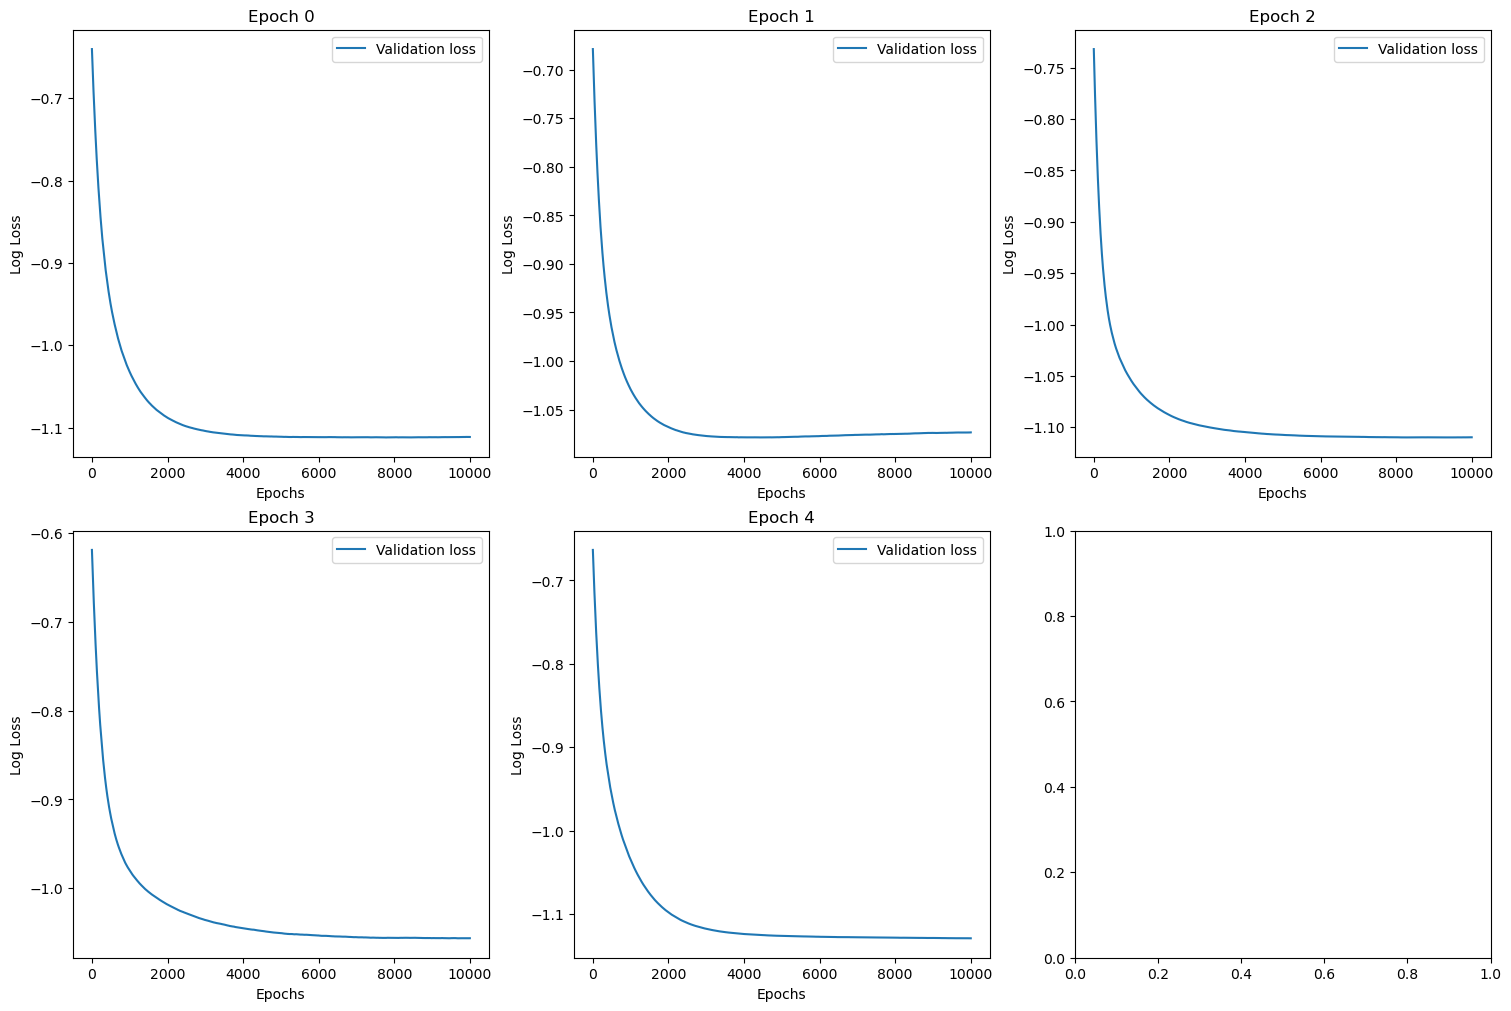

In [13]:
KFoldCrossValidation(
    5, X, y, 10000, draw_curve=True, learning_rate=0.01, 
    activation=sigmoid, activation_grad=sigmoid_grad,
    verbose=True)

# Question 3

## (a)

**Note**: `KFoldCrossValidation` returns a model list, just pick any one of them (for example, the first) for prediction on test dataset.

In [14]:
def generate_X(number, boundary):
    x = (np.random.random(number) * 2 - 1) * boundary
    return x
    
def generate_data(number, stochasticity=0.2):
    x = generate_X(number, 10)
    ratio = generate_X(number, stochasticity) + 1
    y = 3 * np.sin(x) * ratio + 5
    return x, y

In [15]:
def show_correlation(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    r = [
        np.min([np.min(y_pred), np.min(y_true)]), 
        np.max([np.max(y_pred), np.max(y_true)])
    ]
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    plt.scatter(y_pred, y_true, s=5)
    ax.plot(r, r, color='red')
    ax.set_xlabel("Predictions")
    ax.set_ylabel("Ground truth")
    corr = np.corrcoef([y_pred, y_true])[1, 0]
    print("Correlation coefficient:", corr)

def show_plot(x, y_true, y_pred=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.scatter(x, y_true, s=0.5, label='Ground Truth')
    if y_pred is not None:
        ax.scatter(x, y_pred, s=0.5, label="Predicted")
    ax.legend()

Number of epochs with lowest validation: 533
Number of epochs with lowest validation: 461
Number of epochs with lowest validation: 1300
Number of epochs with lowest validation: 1168
Number of epochs with lowest validation: 384
Final results:
Training error: 2.07810171129828+/-0.004980145600523768
Testing error: 2.0790236607310804+/-0.024968369328462227


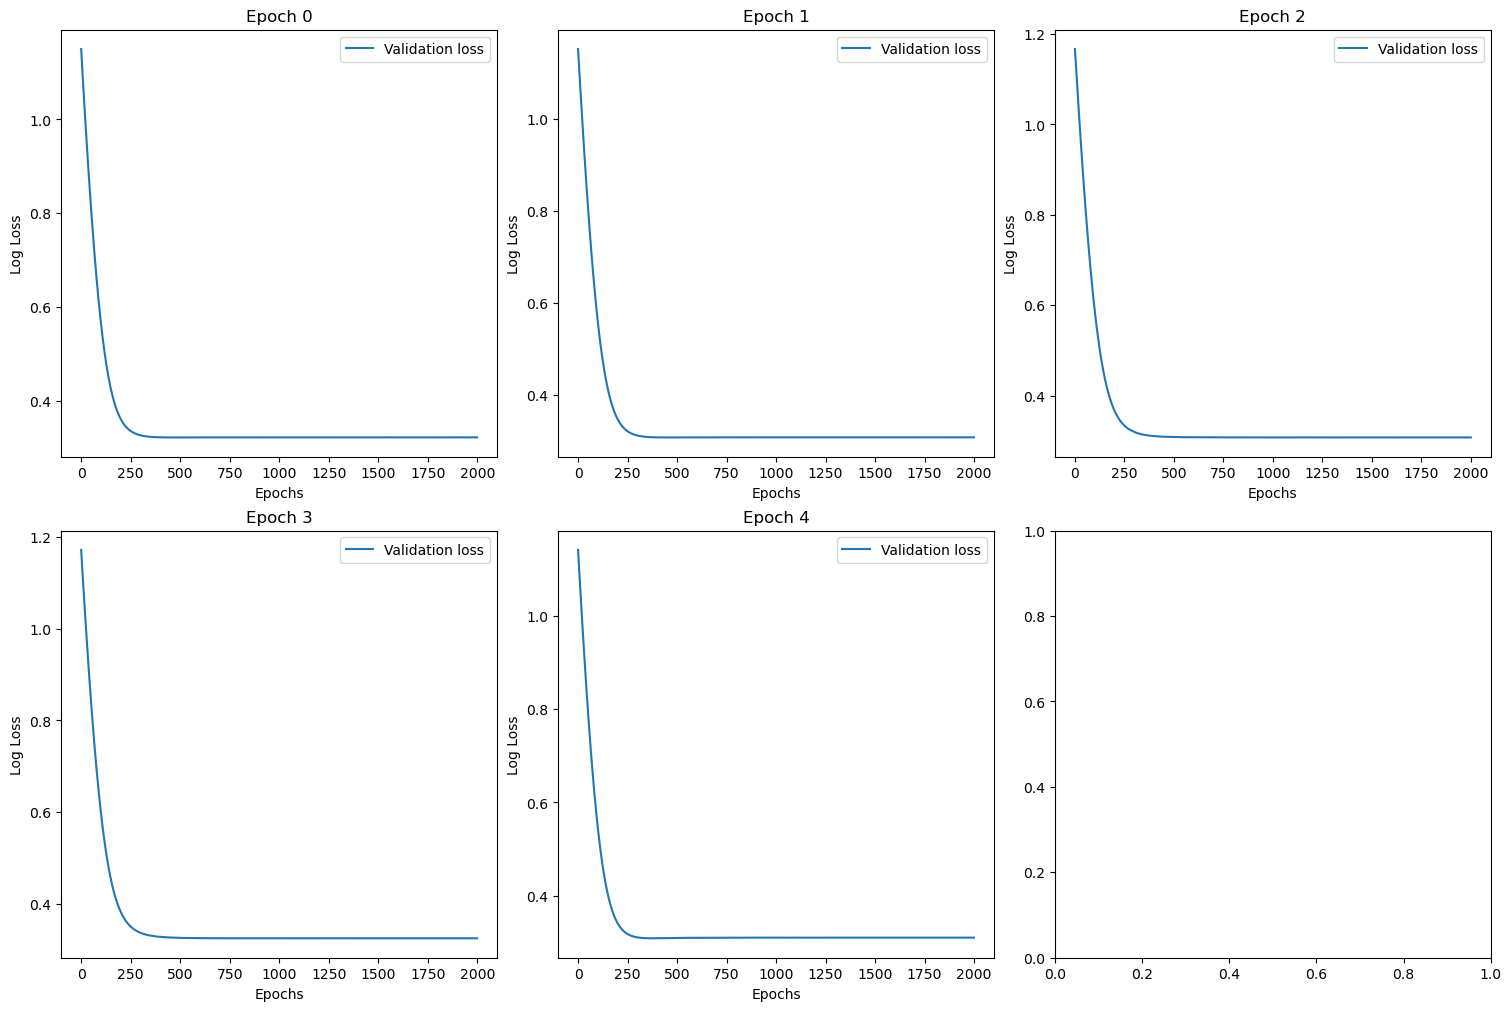

In [16]:
# Generate training data
X_train, y_train = generate_data(5000)
# Initialize the model
model_SP = KFoldCrossValidation(
    5, X_train, y_train, 2000, draw_curve=True, learning_rate=0.1, 
    activation=sigmoid, activation_grad=sigmoid_grad,
    verbose=True)


In [17]:
# Generate predictions
X_test, y_test = generate_data(1000)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Correlation coefficient: 0.16617126353410394


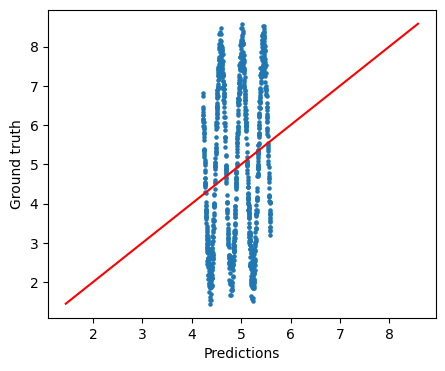

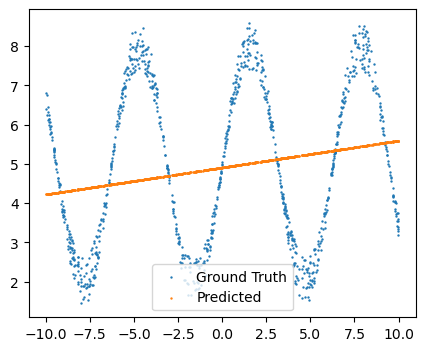

In [18]:
test_model = model_SP[-1]
predictions_QB = test_model.predict(X_test)
# Show the correlation between the predicted and actual test data
show_correlation(predictions_QB, y_test)
show_plot(X_test, y_test, y_pred=predictions_QB)

## (b)

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse


def KFoldCrossValidationMLP(
    k, X, y, epochs, 
    learning_rate=0.01, 
    activation='tanh',
    hidden_layers=(8,),
    verbose=True
):
    """
    K-Fold Validation for MLPRegressor
    
    Parameters
    ---------
    k: int
        The number of fold in validation
    X: numpy.ndarray
        Input samples, shape (n_samples, input_dim)
    y: numpy.ndarray
        Labels, shape (n_samples, output_dim)
    epochs: int
        Number of training epochs
    kwargs: keyword arguments
        Arguments to init a SimplePerceptron model. i.e. learning_rate, activation, activation_grad
    
    Returns
    ------
    model: SimplePerceptron
        The best model
    """
    # MLPRegressor takes 2D array for features
    # and 1D array for labels if the dimension of output is 1
    X = X.reshape(-1, 1) if len(X.shape) == 1 else X

    # do a 5-fold validation
    kf = KFold(n_splits=k, shuffle=True)
    
    models = []
    train_err_list, test_err_list = [], []
    for i, (train_selector, val_selector) in enumerate(kf.split(np.arange(X.shape[0]))):
        # Decide training examples and testing examples for this fold
        X_train, X_test = X[train_selector], X[val_selector]
        y_train, y_test = y[train_selector], y[val_selector]
        
        model = MLPRegressor(
            max_iter=epochs,
            activation=activation, 
            learning_rate_init=learning_rate,
            hidden_layer_sizes=hidden_layers,
            early_stopping=True, validation_fraction=0.2, learning_rate='constant', 
        )
        model.fit(X_train, y_train)
        models.append(model)

        # Report MSE on X_train and X_test
        y_train_pred = model.predict(X_train)
        train_err = mse(y_train_pred, y_train)
        train_err_list.append(train_err)
        
        y_test_pred = model.predict(X_test)
        test_err = mse(y_test_pred, y_test)
        test_err_list.append(test_err)
        if verbose:
            print(f"Train error: {train_err}, Test error: {test_err}")
        
    
    if verbose:      
        print("Final results:")
        print(f"Training error: {np.mean(train_err_list)}+/-{np.std(train_err_list)}")
        print(f"Testing error: {np.mean(test_err_list)}+/-{np.std(test_err_list)}")
    
    return models[np.argmin(test_err_list)]

In [20]:
model_MLP = KFoldCrossValidationMLP(k=5, X=X_train, y=y_train,epochs=1000,
    learning_rate=0.001, 
    activation='tanh',
    hidden_layers=(8,),
    verbose=True)

Train error: 2.361261265487397, Test error: 2.4607502979663995
Train error: 2.3490132950397142, Test error: 2.4699530273130894
Train error: 2.3746771019765283, Test error: 2.322776111478457
Train error: 2.393102475673507, Test error: 2.2575157540850417
Train error: 0.6154975171992407, Test error: 0.5873614816453683
Final results:
Training error: 2.0187103310752774+/-0.7017591056222838
Testing error: 2.019671334497671+/-0.7207299415501728


C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Correlation coefficient: 0.918298773065105


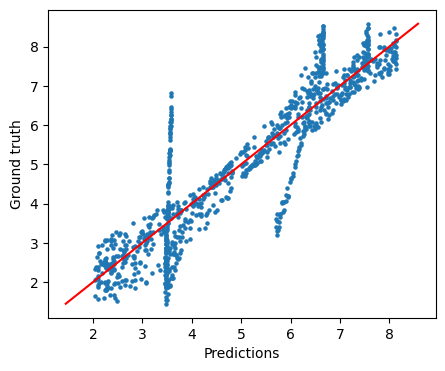

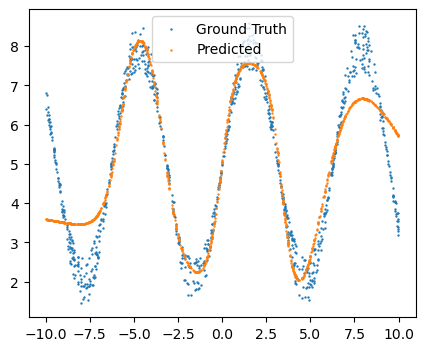

In [21]:
predictions_QB = model_MLP.predict(X_test)
# Show the correlation between the predicted and actual test data
show_correlation(predictions_QB, y_test)
show_plot(X_test, y_test, y_pred=predictions_QB)

## (c)

In [22]:
# epochs = 100, leanring rate = 0.01, hidden_layers = (8,)
model_MLP_c1 = KFoldCrossValidationMLP(k=5, X=X_train, y=y_train,epochs=100,
    learning_rate=0.01, 
    activation='tanh',
    hidden_layers=(8,),
    verbose=True)

C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.6990859134043186, Test error: 0.5558661495631213
Train error: 1.367191793211694, Test error: 1.4368978050674828


C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 2.3775722901209084, Test error: 2.4703915223429367
Train error: 2.0110137182174386, Test error: 2.162670519679411
Train error: 1.8296411651307654, Test error: 1.7583153698767717
Final results:
Training error: 1.656900976017025+/-0.5789547918215171
Testing error: 1.6768282733059447+/-0.6612939101407262


C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Correlation coefficient: 0.9094098248994252


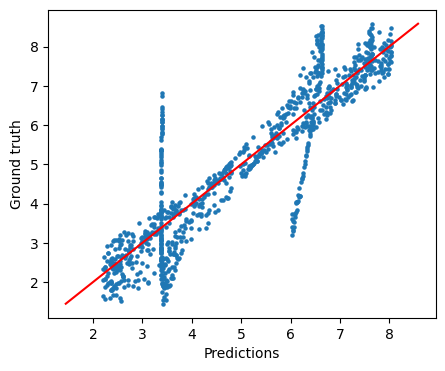

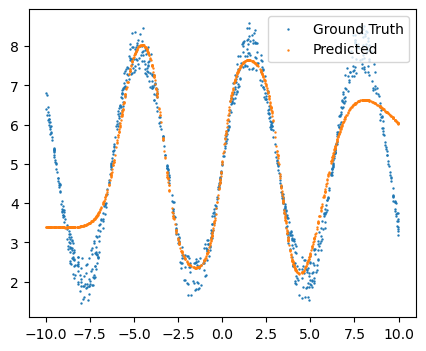

In [23]:
predictions_QC1 = model_MLP_c1.predict(X_test)
# Show the correlation between the predicted and actual test data
show_correlation(predictions_QC1, y_test)
show_plot(X_test, y_test, y_pred=predictions_QC1)

In [24]:
# epochs = 2000, leanring rate = 0.01, hidden_layers = (8,)
model_MLP_c2 = KFoldCrossValidationMLP(k=5, X=X_train, y=y_train,epochs=2000,
    learning_rate=0.01, 
    activation='tanh',
    hidden_layers=(8,),
    verbose=True)

Train error: 0.401773764907651, Test error: 0.35167908960413763
Train error: 0.14260199632064405, Test error: 0.1607312303182861
Train error: 2.390798120637506, Test error: 2.3807438323035255
Train error: 0.395809228143594, Test error: 0.35462252207953743
Train error: 2.030087934384312, Test error: 1.8893773438387584
Final results:
Training error: 1.0722142088787414+/-0.9409971901101083
Testing error: 1.027430803628849+/-0.9203138057060585


Correlation coefficient: 0.9826694731228567


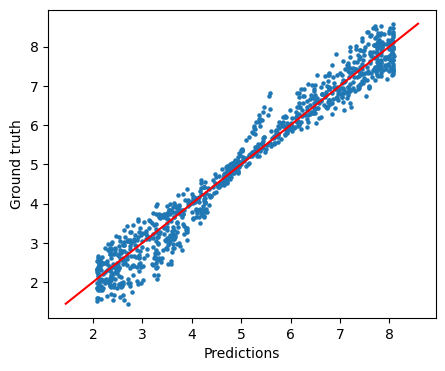

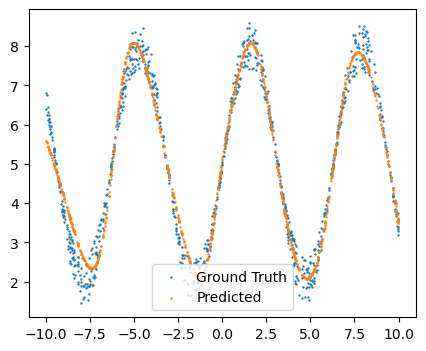

In [25]:
predictions_QC2 = model_MLP_c2.predict(X_test)
# Show the correlation between the predicted and actual test data
show_correlation(predictions_QC2, y_test)
show_plot(X_test, y_test, y_pred=predictions_QC2)

In [26]:
# epochs = 2000, leanring rate = 0.0001, hidden_layers = (8,)
model_MLP_c3 = KFoldCrossValidationMLP(k=5, X=X_train, y=y_train,epochs=2000,
    learning_rate=0.0001, 
    activation='tanh',
    hidden_layers=(8,),
    verbose=True)

Train error: 4.117635865913593, Test error: 4.0002542097787215


C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 2.99721571314909, Test error: 3.1571300608446244


C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 3.032458627922114, Test error: 2.9567733756827947


C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 3.078561925704808, Test error: 3.201703194905179
Train error: 4.0341717403199695, Test error: 4.039581880791519
Final results:
Training error: 3.4520087746019152+/-0.5107435259731717
Testing error: 3.4710885444005677+/-0.45582002229579843


Correlation coefficient: 0.5547187690767267


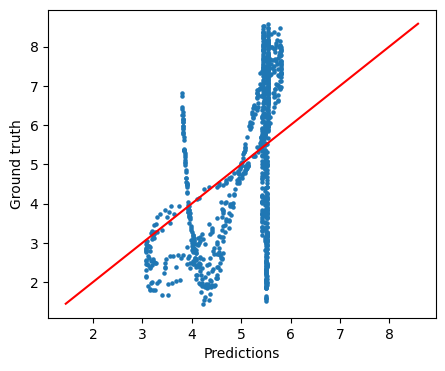

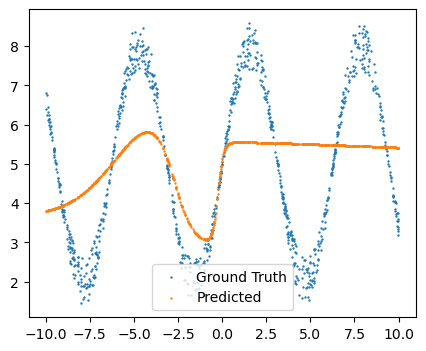

In [27]:
predictions_QC3 = model_MLP_c3.predict(X_test)
# Show the correlation between the predicted and actual test data
show_correlation(predictions_QC3, y_test)
show_plot(X_test, y_test, y_pred=predictions_QC3)

In [28]:
# epochs = 2000, leanring rate = 0.01, hidden_layers = (8,16)
model_MLP_c4 = KFoldCrossValidationMLP(k=5, X=X_train, y=y_train,epochs=2000,
    learning_rate=0.01, 
    activation='tanh',
    hidden_layers=(8,16),
    verbose=True)

Train error: 0.06367320203329466, Test error: 0.062358538641076586
Train error: 0.06085818836019122, Test error: 0.05920234553644843
Train error: 0.05957432339794482, Test error: 0.0643750712737207
Train error: 0.06136040424474274, Test error: 0.05684620645456772
Train error: 0.4028796711359833, Test error: 0.3872118240398647
Final results:
Training error: 0.12966915783443134+/-0.1366116919683254
Testing error: 0.12599879718913562+/-0.1306320468024398


Correlation coefficient: 0.9930037195152521


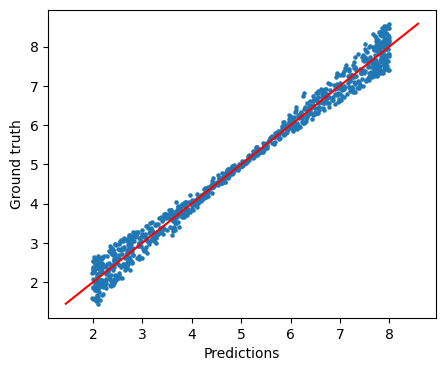

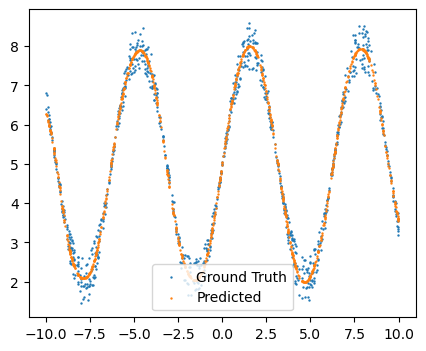

In [29]:
predictions_QC4 = model_MLP_c4.predict(X_test)
# Show the correlation between the predicted and actual test data
show_correlation(predictions_QC4, y_test)
show_plot(X_test, y_test, y_pred=predictions_QC4)

In [30]:
# epochs = 2000, leanring rate = 0.01, hidden_layers = (4,)
model_MLP_c5 = KFoldCrossValidationMLP(k=5, X=X_train, y=y_train,epochs=2000,
    learning_rate=0.01, 
    activation='tanh',
    hidden_layers=(2,),
    verbose=True)

Train error: 3.9856508045453922, Test error: 4.169517046103876
Train error: 4.025254649808418, Test error: 4.023472070082554
Train error: 4.026967799432048, Test error: 4.002764784686858
Train error: 4.040934939042797, Test error: 3.9480688761836236
Train error: 3.8387731732867794, Test error: 3.8198703188840155
Final results:
Training error: 3.983516273223086+/-0.07467550012891822
Testing error: 3.9927386191881853+/-0.11329123215096198


Correlation coefficient: 0.361301213050211


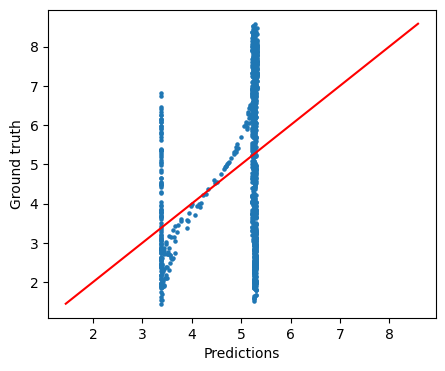

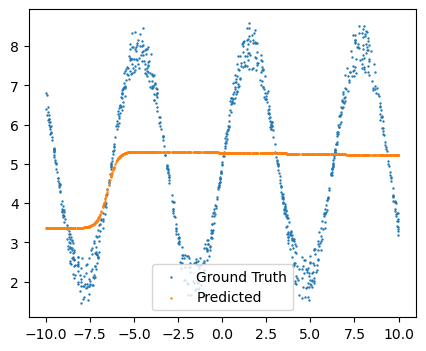

In [31]:
predictions_QC5 = model_MLP_c5.predict(X_test)
# Show the correlation between the predicted and actual test data
show_correlation(predictions_QC5, y_test)
show_plot(X_test, y_test, y_pred=predictions_QC5)

In [32]:
# epochs = 2000, leanring rate = 0.01, hidden_layers = (20,)
model_MLP_c6 = KFoldCrossValidationMLP(k=5, X=X_train, y=y_train,epochs=2000,
    learning_rate=0.01, 
    activation='tanh',
    hidden_layers=(20,),
    verbose=True)

Train error: 0.07444426963895767, Test error: 0.06905537331255021
Train error: 0.4033871163439327, Test error: 0.3596121181505557
Train error: 0.06786438212857031, Test error: 0.07329317134441249
Train error: 0.07588584178879561, Test error: 0.08002475649034194
Train error: 0.06992648717451644, Test error: 0.07104922930722575
Final results:
Training error: 0.13830161941495456+/-0.13257478961296618
Testing error: 0.13060692972101723+/-0.11456222174043408


Correlation coefficient: 0.9914309138539604


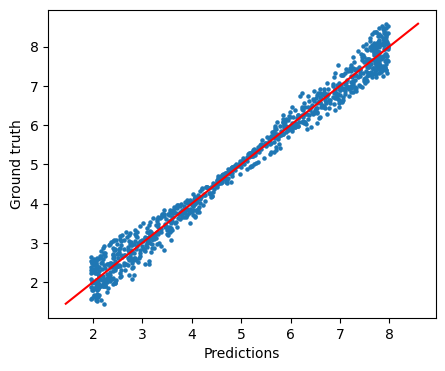

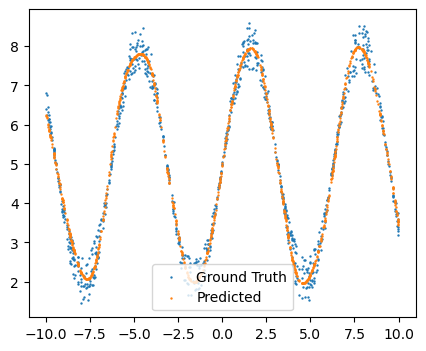

In [33]:
predictions_QC6 = model_MLP_c6.predict(X_test)
# Show the correlation between the predicted and actual test data
show_correlation(predictions_QC6, y_test)
show_plot(X_test, y_test, y_pred=predictions_QC6)